(array([453.48025137]), array([1511.18879374]))


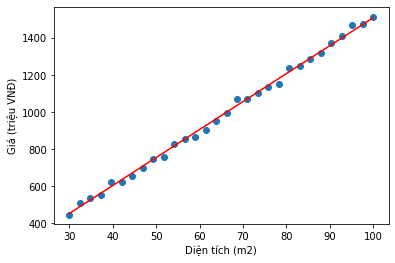

Giá nhà cho 50m^2 là:  755.6826920443762


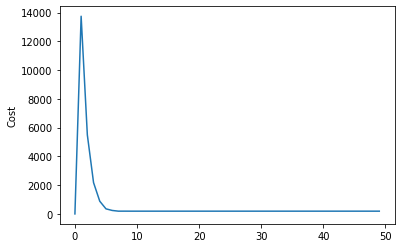

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data_linear.csv').values
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

plt.scatter(x, y)
plt.xlabel('Diện tích (m2)')
plt.ylabel('Giá (triệu VNĐ)')

# Model: y = w1 ∗ x + w0 => Tìm w1, w0
# Loss function: J = 0.5*sum(|y^i - yi|)/N (Tổng độ lệch trung bình giữa giá thật và giá dự đoán)
#      • J không âm
#      • J càng nhỏ thì đường thẳng càng gần điểm dữ liệu
# Sử dụng: Gradient descent
#      1. Khởi tạo giá trị x = x0 tùy ý
#      2. Gán x = x - learning_rate * f’(x) (learning_rate là hằng số không âm)
#      3. Nếu f(x) đủ nhỏ thì dừng lại, ngược lại tiếp tục bước 2

x = np.hstack((np.ones((N, 1)), x))
w = np.array([0., 1.]).reshape(-1, 1)

numOfIteration = 100
cost = np.zeros((numOfIteration, 1))
learning_rate = 0.00001

for i in range(1, numOfIteration):
    # yi = w1 * x + w0
    yi = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(abs(yi)) # ?
    w[0] -= learning_rate*np.sum(yi)
    w[1] -= learning_rate*np.sum(yi * x[:,1].reshape(-1,1))

predict = np.dot(x, w)
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
plt.show()

x1 = 50
y1 = w[0] + w[1] * x1
print('Giá nhà cho 50m^2 là: ', y1[0])

# Loss function
plt.plot(range(len(cost[:50])), cost[:50])
plt.ylabel("Cost")
plt.show()